<a href="https://colab.research.google.com/github/audrey-fontana/arvore-decisao-titanic/blob/main/%C3%81rvore_de_Decis%C3%A3o_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvore de Decisão - TITANIC
A partir dos dados de passageiros do Titanic, modelar uma árvore de decisão que calcule as chances de um passageiro sobreviver ao acidente, com base nas características fornecidas.

Programa original: Professor João Fernando Serrajordia Rocha de Mello

In [ ]:
# Instalar os pacotes
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [ ]:
# Instalar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Função para separar o ambiente de treino e teste
# Métricas de avaliação do modelo programadas no scikit
from sklearn.metrics import accuracy_score, classification_report, \
    confusion_matrix, balanced_accuracy_score

# Classe de árvore e funções auxiliares
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
# Carregar os dados
titanic = sns.load_dataset('titanic')

# Avaliando o significado de cada coluna
print(titanic.head())
print(titanic.columns)

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


**Significado de cada coluna:**

survived (0 ou 1): se o passageiro sobreviveu (0 = não; 1 = sim)

pclass: classe na qual o passageiro se encontrava

sex: masculino ou feminino

age: idade

sibsp ("siblings/spouse"): se o passageiro tinha irmãos ou cônjuge a bordo

parch ("parents/children"): se o passageiro tinha pais ou filhos a bordo

fare: tarifa paga pelo passageiro

embarked: cidade na qual o passageiro embarcou (apenas a inicial)

class: classe na qual o passageiro se encontrava

who: se o passageiro era homem ou mulher

adult_male (True ou False): se o passageiro era homem

deck: convés onde a cabine do passageiro se localizava

embark_town: cidade na qual o passageiro embarcou (texto completo)

alive (yes/no): se o passageiro sobreviveu

alone: se o passageiro estava sozinho na viagem

In [ ]:
# Análise descritiva básica
# Verificando o tipo de dados contidos em cada uma das colunas

for variavel in titanic.columns:
    print(f'\n\nAnálise univariada de {variavel}:')
    print(titanic[variavel].describe())



Análise univariada de survived:
count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64


Análise univariada de pclass:
count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: pclass, dtype: float64


Análise univariada de sex:
count      891
unique       2
top       male
freq       577
Name: sex, dtype: object


Análise univariada de age:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


Análise univariada de sibsp:
count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: sibsp, dtype: float64


Anál

In [ ]:
# Análise exploratória das colunas selecionadas

for variavel in ['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'class', 'who',
                 'adult_male', 'deck', 'embark_town', 'alive', 'alone']:
    print(f'\n\nFrequencias da variável: {variavel}')

# Inclui os dados de linhas em branco com o "dropna=False" e, ordena os resultados com base nos índices da categoria com o "sort.index()"
    print(titanic[variavel].value_counts(dropna=False).sort_index())



Frequencias da variável: pclass
pclass
1    216
2    184
3    491
Name: count, dtype: int64


Frequencias da variável: sex
sex
female    314
male      577
Name: count, dtype: int64


Frequencias da variável: sibsp
sibsp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64


Frequencias da variável: parch
parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64


Frequencias da variável: embarked
embarked
C      168
Q       77
S      644
NaN      2
Name: count, dtype: int64


Frequencias da variável: class
class
First     216
Second    184
Third     491
Name: count, dtype: int64


Frequencias da variável: who
who
child     83
man      537
woman    271
Name: count, dtype: int64


Frequencias da variável: adult_male
adult_male
False    354
True     537
Name: count, dtype: int64


Frequencias da variável: deck
deck
A       15
B       47
C       59
D       33
E       32
F       13
G        4
NaN    688
Name: count, 

In [ ]:
# Funções para criar análises gráficas para cada variável desejada

import pandas as pd

from sklearn.metrics import accuracy_score, classification_report, \
    confusion_matrix, balanced_accuracy_score, roc_auc_score, roc_curve

import seaborn as sns

import matplotlib.pyplot as plt

def descritiva(df_, var, vresp='survived', max_classes=5):
    """
    Gera um gráfico descritivo da taxa de sobreviventes por categoria da variável especificada.

    Parâmetros:
    df : DataFrame - Base de dados a ser analisada.
    var : str - Nome da variável categórica a ser analisada.

    max_classes : int - Número máximo de classes a serem exibidas no gráfico.
    """

    df = df_.copy()

    if df[var].nunique()>max_classes:
        df[var] = pd.qcut(df[var], max_classes, duplicates='drop')

    fig, ax1 = plt.subplots(figsize=(10, 6))

    sns.pointplot(data=df, y=vresp, x=var, ax=ax1)

    # Criar o segundo eixo y para a taxa de sobreviventes
    ax2 = ax1.twinx()
    sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)
    ax2.set_ylabel('Frequência', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    ax1.set_zorder(2)
    ax1.patch.set_visible(False)  # Tornar o fundo do eixo 1 transparente

    # Exibir o gráfico
    plt.show()

<ipython-input-6-9cdaf00d91da>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


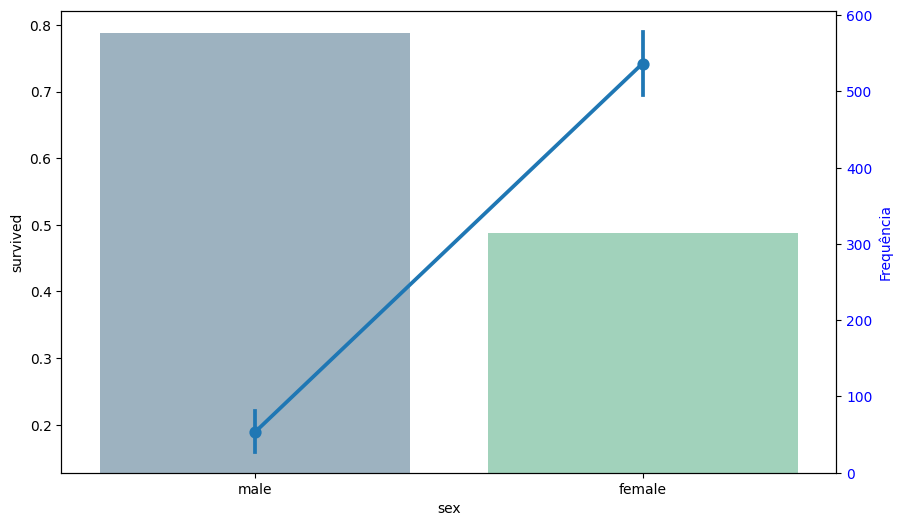

<ipython-input-6-9cdaf00d91da>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


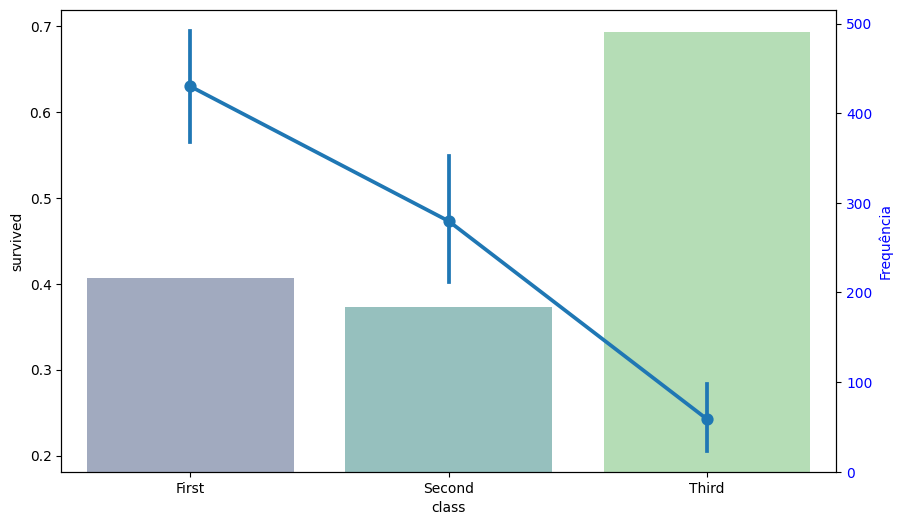

<ipython-input-6-9cdaf00d91da>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


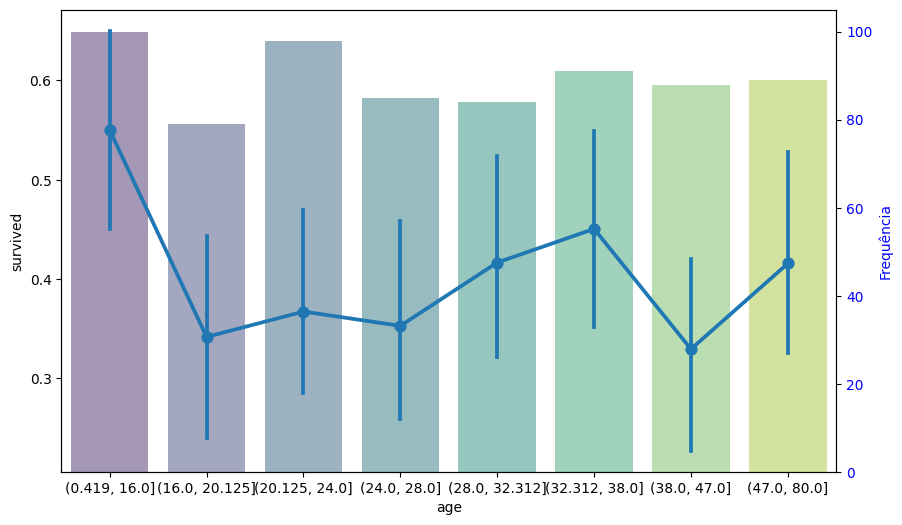

<ipython-input-6-9cdaf00d91da>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


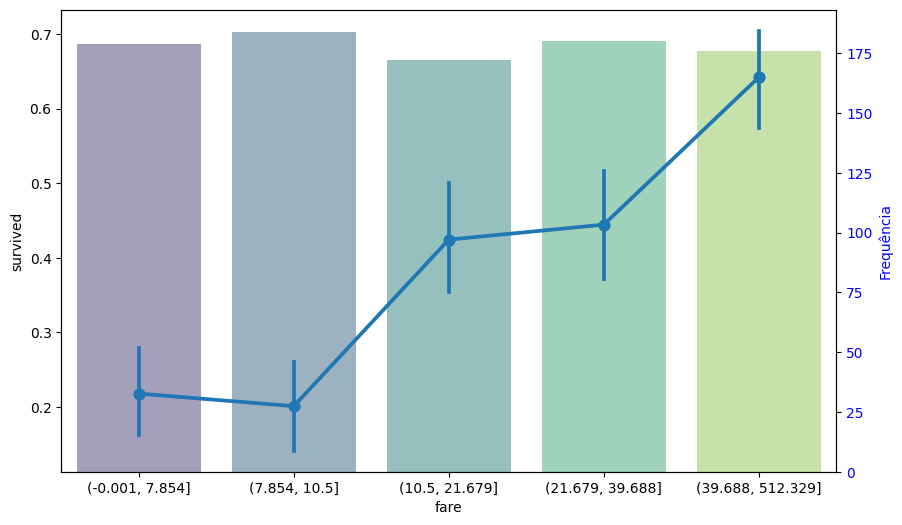

<ipython-input-6-9cdaf00d91da>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


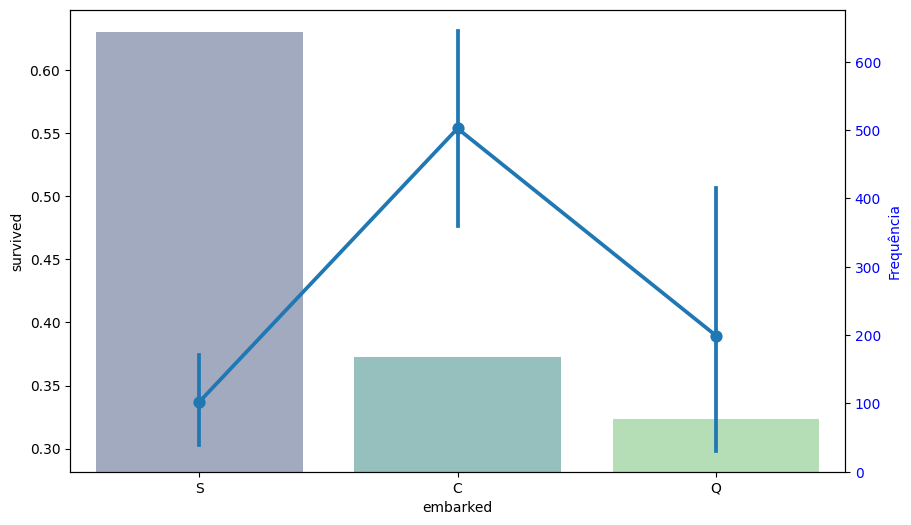

<ipython-input-6-9cdaf00d91da>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


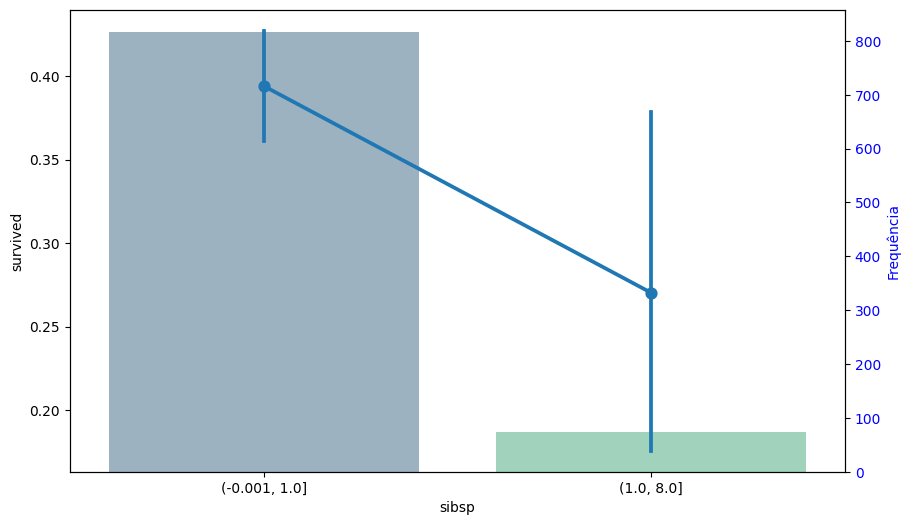

<ipython-input-6-9cdaf00d91da>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


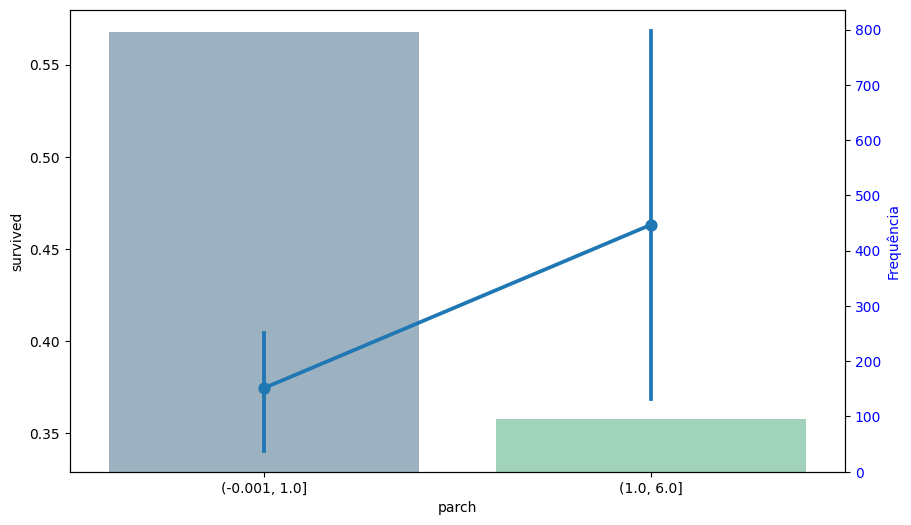

In [ ]:
# Plotando os gráficos para cada uma das variáveis
descritiva(titanic, "sex")
descritiva(titanic, "class")
descritiva(titanic, "age", max_classes=8)
descritiva(titanic, "fare", max_classes=5)
descritiva(titanic,"embarked")
descritiva(titanic,"sibsp")
descritiva(titanic,"parch")

**Possíveis conclusões a partir das análises gráficas:**

sex: apesar da frequência de pessoas do sexo masculino a bordo ser mais alta do que a frequência de pessoas do sexo feminino, a taxa de sobrevivência das mulheres é bem mais alta do que a taxa de sobrevivência dos homens.

class: a frequência de passageiros da terceira classe é consideravelmente mais alta do que as frequências de passageiros da primeira e segunda classe, entretanto, a taxa de sobrevivência dos passageiros de terceira classe é significativamente menor do que nas outras duas.

age: a maior taxa de sobrevivência está entre os passageiros entre 0.4 e 17 anos, enquanto a maior taxa de morte está entre os passageiros que possuiam idades entre 27 e 29 anos, mesmo que essa faixa etária seja a mais frequente.

fare: a maior taxa de sobreviventes está entre os que pagaram uma tarifa mais alta. E é possível observar que as chances de sobrevivencia aumentam conforme maior a taxa paga pelo passageiro.

embarked: apenas com as informações gráficas não é possível identificar uma relação entre a cidade que o passageiro embarcou e a sua taxa de sobrevivência.

sibsp: apenas com as informações gráficas não é possível identificar uma relação entre a presença de irmãos ou conjugês embarcados e a taxa de sobrevivência de uma pessoa.

parch: apenas com as informações fráficas não é possível identificar uma relação entre a presença de pais e filhos embarcados e a taxa de sobrevivência de uma pessoa.

In [ ]:
# Avaliar dados faltantes

def relatorio_missing(df):
    print(f'Número de linhas: {df.shape[0]} | Número de colunas: {df.shape[1]}')
    return pd.DataFrame({'Pct_missing': df.isna().mean().apply(lambda x: f"{x:.1%}"),
                          'Freq_missing': df.isna().sum().apply(lambda x: f"{x:,.0f}").replace(',','.')})
relatorio_missing(titanic)

Número de linhas: 891 | Número de colunas: 15


,Pct_missing,Freq_missing
survived,0.0%,0
pclass,0.0%,0
sex,0.0%,0
age,19.9%,177
sibsp,0.0%,0
parch,0.0%,0
fare,0.0%,0
embarked,0.2%,2
class,0.0%,0
who,0.0%,0


In [ ]:
# Tratar variável age
# Calcula a média de idade dos passageiros (ignorando as colunas nulas) e substituí os nulos pela média calculada

titanic['age'] = titanic.age.fillna(titanic.age.mean())

Perceba que algumas colunas possuem variáveis redundantes, ou seja, que representam a mesma informação. Assim, iremos remover essas colunas.

`class` - representa a mesma informação que `pclass`, vamos excluir a class pois o tipo dessa variável é um objeto, enquanto que o tipo da variável pclass é um float.

`who` e `adult_male` - representam a mesma informação que `sex`.

`deck` - é uma variável que possui muitos valores faltantes e por consequência não é uma boa variável para entrar no modelo.

`embark_town` - representa a mesma informação que `embarked`.

`alive` - representa a mesma informação que `survived`.

`alone` - consequentemente apresenta a mesma informação quando consideradas as variáveis de `sibsp` e `parch`.


In [ ]:
# Remover variáveis redundantes
titanic.drop(columns=['class', 'who', 'adult_male', 'deck', 'embark_town',
                      'alive', 'alone'], inplace=True)

Para realizarmos o modelo, não podemos trabalhar com variáveis do tipo objeto, portanto é necessário realizar um tratamento dessas variáveis.

In [ ]:
# Verificar variáveis string

metadados = titanic.dtypes

print('\nVariávels string:')
print(metadados[metadados == 'object'])

metadados


Variávels string:
sex         object
embarked    object
dtype: object


,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object


A função `get_dummies` transforma uma informação categórica em colunas numéricas, criando uma coluna separada para cada valor único da variável original. Cada linha recebe um 1 ou 0, indicando a presença ou ausência daquela categoria.

*Como a função funciona?*

Se você aplicar `get_dummies` na coluna "Sexo", o pandas criará duas novas colunas: uma para "Masculino" e outra para "Feminino". Cada coluna terá um valor 1 se a categoria estiver presente e 0 caso contrário.

In [ ]:
# Transformar variáveis string em dummies

# No pandas, um método prático de fazer isto é com o get_dummies
titanic_dummies = pd.get_dummies(titanic, drop_first=True)

# Conferir a estrutura da tabela
titanic_dummies.info()
# Checar primeiras 3 linhas
titanic_dummies.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   age         891 non-null    float64
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   sex_male    891 non-null    bool   
 7   embarked_Q  891 non-null    bool   
 8   embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True


In [ ]:
# Salvando a base tratada

# O pkl é um formato do Python, que vai manter todas as propriedades do objeto
titanic_dummies.to_pickle('titanic1.pkl')
# Parquet é um formato popular, eficiente, compatível com outras plataformas
titanic_dummies.to_parquet('titanic1.parquet')

Para rodar a árvore vamos seguir os passos:

As variáveis "X" serão as variáveis que explicam o resultado de saída (se sobreviveu ou não), que são todas as variáveis contidas no banco de dados menos a coluna de "survived". Por isso utilizamos o .drop para não enquadrar essa variável em "X".

A variável "y" é a variável target, que o modelo tenta prever, ou seja, a informação de "survived"

Devemos criar um objeto da árvore de decisão chamado "arvore", usando a classe DecisionTreeClassifier do scikit-learn.

-> `criterion='gini'`: O critério de divisão da árvore é o índice de Gini, que mede a impureza de uma divisão.

O **índice de Gini** é uma medida de impureza usada para selecionar as melhores divisões em uma árvore de decisão, favorecendo divisões que resultem em grupos com maior homogeneidade. Quanto menor o valor do Gini, melhor a divisão.

-> `max_depth = 3`: Limita a profundidade máxima da árvore de decisão a 3 níveis, controlando a complexidade do modelo.

-> `random_state=42`: Garante que os resultados sejam reprodutíveis, fixando a semente para a aleatoriedade.

Na sequência, utilizamos o modelo `.fit` para treinar a árvore

-> `fit()`: Método que treina o modelo de árvore de decisão. Ele usa as variáveis explicativas (X) e a variável resposta (y) para aprender a relação entre elas.

In [ ]:
# Rodando a primeira árvore

# No Scikitlearn, vamos usar a seguinte estrutura:

# Um objeto X com as variáveis explicativas (miúsculo por serem várias)
X = titanic_dummies.drop(columns = ['survived'])
# Um objeto y com a variável resposta (target) minúsculo por ser só 1
y = titanic_dummies['survived']

# Estanciar a classe da árvore de decisão em um objeto chamado arvore
# Este objeto não possui os dados em um primeiro momento
# Mas ela possui todos os atributos e métodos que precisaremos
arvore = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state=42)

# Treinar o modelo com o método .fit(). Aqui processamos os dados!
arvore.fit(X, y)

# OBS: O objeto árvore contendo os atributos e métodos que precisamos
# Vamos usar esse objeto para várias coisas como:
#    visualizar as regras da árvore, avaliar a árvore, classificar novas linhas

DecisionTreeClassifier(max_depth=3, random_state=42)

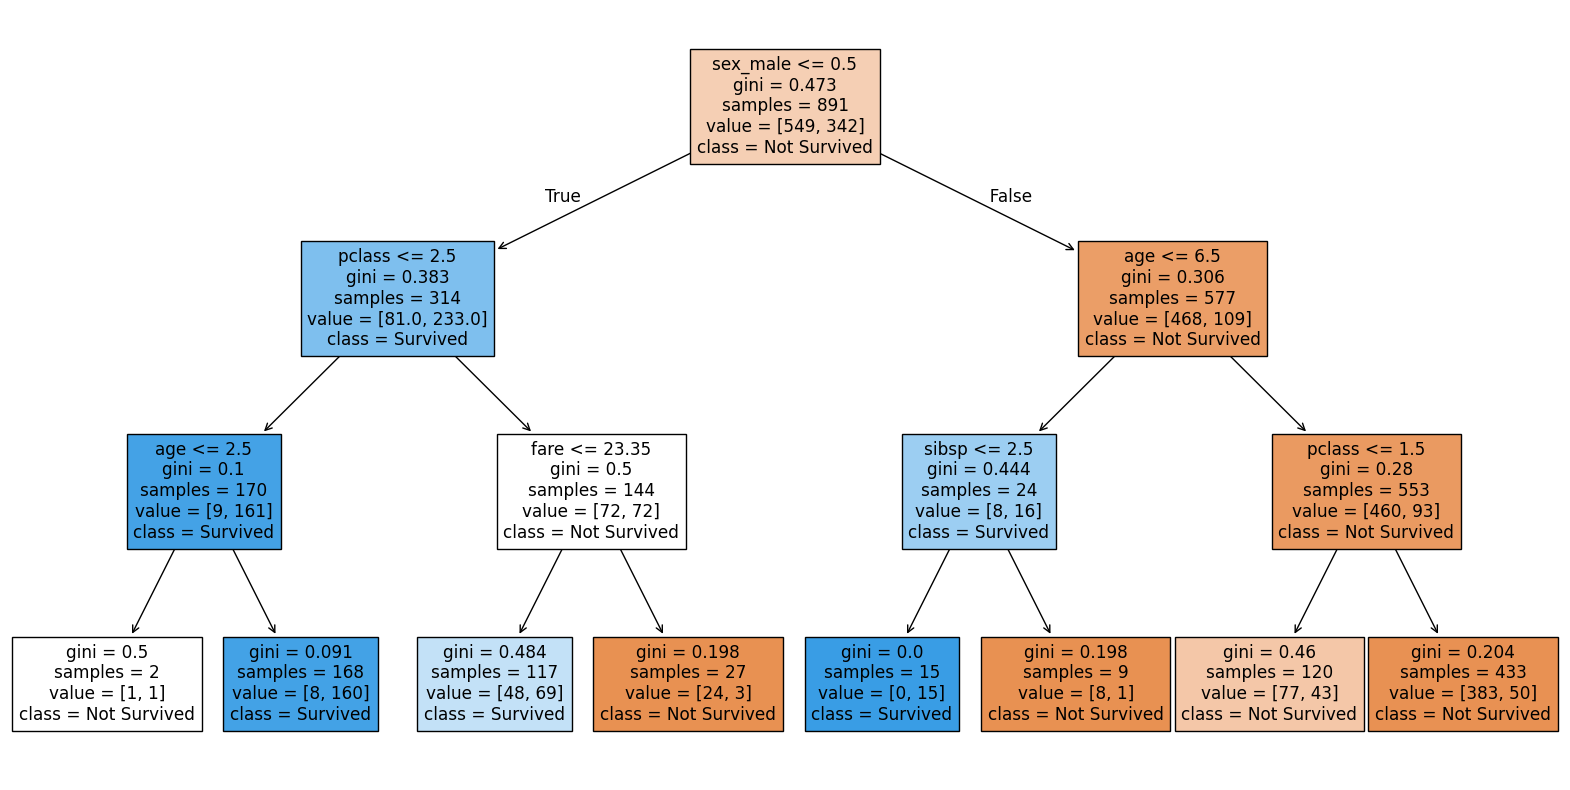

In [ ]:
# Plotar a árvore
plt.figure(figsize=(20, 10))
plot_tree(arvore, feature_names=X.columns.tolist(), class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

In [ ]:
# Novos dados

# Suponha que temos novos dados para classiicar
novos_dados = X.tail() # como exemplo, vamos classificar as 5 últimas linhas do banco de dados
print(novos_dados)

     pclass        age  sibsp  parch   fare  sex_male  embarked_Q  embarked_S
886       2  27.000000      0      0  13.00      True       False        True
887       1  19.000000      0      0  30.00     False       False        True
888       3  29.699118      1      2  23.45     False       False        True
889       1  26.000000      0      0  30.00      True       False       False
890       3  32.000000      0      0   7.75      True        True       False


In [ ]:
# Classificando com a árvore

# Predict é o método que classifica as novas observações
#    Lembrete: a classificação é pela classe mais frequente da folha
classificação_novos_dados = arvore.predict(novos_dados)
classificação_novos_dados

array([0, 1, 0, 0, 0])

O resultado acima indica que os novos dados fornecidos possuem uma saída de:

[0, 1, 0, 0, 0] ou seja [não sobreviveu, sobreviveu, não sobreviveu, não sobreviveu, não sobreviveu]

In [ ]:
# Avaliando a classificação
# Vamos comparar a classificação da árvore com o valor observado

# Guardar a classificação da árvore
classificação_treino = arvore.predict(X)

# Comparar com os valores reais por uma tabela cruzada
print(pd.crosstab(classificação_treino, y, margins=True))
print(pd.crosstab(classificação_treino, y, normalize='index'))
print(pd.crosstab(classificação_treino, y, normalize='columns'))

acertos = classificação_treino == y
pct_acertos = acertos.sum()/acertos.shape[0]
print(f'Acurácia (taxa de acerto): {pct_acertos:.2%}')

survived    0    1  All
row_0                  
0         493   98  591
1          56  244  300
All       549  342  891
survived         0         1
row_0                       
0         0.834179  0.165821
1         0.186667  0.813333
survived         0        1
row_0                      
0         0.897996  0.28655
1         0.102004  0.71345
Acurácia (taxa de acerto): 82.72%


**Predição**: O modelo faz previsões sobre os dados de treinamento.

**Matriz de Confusão**: O código cria tabelas cruzadas (matrizes de confusão) para comparar as previsões com os valores reais, com diferentes formas de normalização (contagens, por linha, por coluna).

**Acurácia**: Calcula a taxa de acerto do modelo (quantidade de previsões corretas em relação ao total de amostras) e a exibe como uma porcentagem.


A acurácia da árvore é: 82.7%
A acurácia balanceada da árvore é: 80.6%


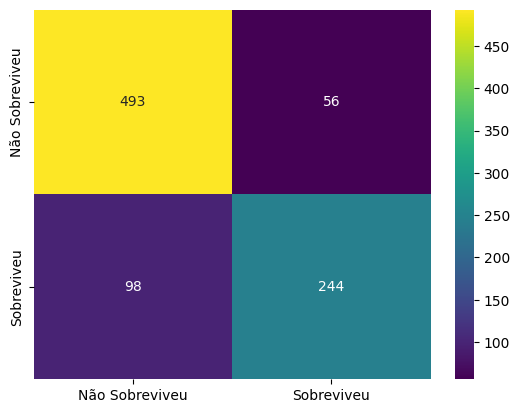


               precision    recall  f1-score   support

           0       0.83      0.90      0.86       549
           1       0.81      0.71      0.76       342

    accuracy                           0.83       891
   macro avg       0.82      0.81      0.81       891
weighted avg       0.83      0.83      0.82       891



In [ ]:
# Calculando acurácia e matriz de confusão

# Vamos avaliar o modelo com algumas funções próprias do Scikit-Learn
# A função confudion_matrix faz basicamente a comparação acima
cm = confusion_matrix(y, arvore.predict(X))
# accuracy_score calcula o percentual de acertos
ac = accuracy_score(y, arvore.predict(X))
# Essa função pondera para forçar a distribuição da target como uniforme
bac = balanced_accuracy_score(y, arvore.predict(X))

print(f'\nA acurácia da árvore é: {ac:.1%}')
print(f'A acurácia balanceada da árvore é: {bac:.1%}')

# Visualização gráfica
sns.heatmap(cm,
            annot=True, fmt='d', cmap='viridis',
            xticklabels=['Não Sobreviveu', 'Sobreviveu'],
            yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.show()

# Relatório de classificação do Scikit
print('\n', classification_report(y, arvore.predict(X)))

Uma **matriz de confusão** é geralmente uma tabela 2x2 para problemas de classificação binária (com duas classes, como "sim" ou "não", "positivo" ou "negativo"). Ela pode ser expandida para problemas de múltiplas classes. Para uma classificação binária, a matriz tem a seguinte estrutura:

Verdadeiro Positivo (TP - True Positive): O modelo previu corretamente a classe positiva (ex: o modelo previu que uma pessoa sobreviveu e ela realmente sobreviveu).

Falso Positivo (FP - False Positive): O modelo previu a classe positiva incorretamente (ex: o modelo previu que uma pessoa sobreviveu, mas ela realmente não sobreviveu).

Verdadeiro Negativo (TN - True Negative): O modelo previu corretamente a classe negativa (ex: o modelo previu que uma pessoa não sobreviveu e ela realmente não sobreviveu).

Falso Negativo (FN - False Negative): O modelo previu a classe negativa incorretamente (ex: o modelo previu que uma pessoa não sobreviveu, mas ela realmente sobreviveu).

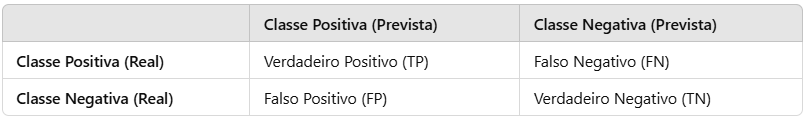

A **acurácia** representa a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões feitas.

A **acurácia balanceada** foi criada para corrigir problemas em casos de classes desbalanceadas. Ela calcula a média das taxas de acerto para cada classe (positiva e negativa) de forma independente, levando em consideração o desbalanceamento das classes.
Ela leva em conta o desempenho do modelo em ambas as classes (positiva e negativa), prevenindo que o modelo simplesmente "ignore" a classe minoritária.